In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## Learning Pytorch!

In [9]:
# Creating a tensor from data
# tensor = array
x_data = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Creating a tensor from numpy array
np_array = np.array([[5.0, 6.0], [7.0, 8.0]])
x_np = torch.from_numpy(np_array)

# Creating tensors with specific dimensions
x_zeros = torch.zeros(2, 3)
x_ones = torch.ones(2, 3)
x_random = torch.rand(2, 3)

In [14]:
x_zeros, x_ones, x_random

(tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[0.2352, 0.9875, 0.0546],
         [0.2285, 0.2603, 0.8475]]))

#### Practice maniupations with PyTorch
Using the following matrix, add 2, multiply by 2, and then multiply y against itself. This should feel like Numpy.

In [10]:
# Basic operations
y = torch.tensor([[9.0, 10.0], 
                  [11.0, 12.0]])


In [11]:
y + 2, y*2, y**2

(tensor([[11., 12.],
         [13., 14.]]),
 tensor([[18., 20.],
         [22., 24.]]),
 tensor([[ 81., 100.],
         [121., 144.]]))

## A one layer perceptron

Text(0, 0.5, 'y')

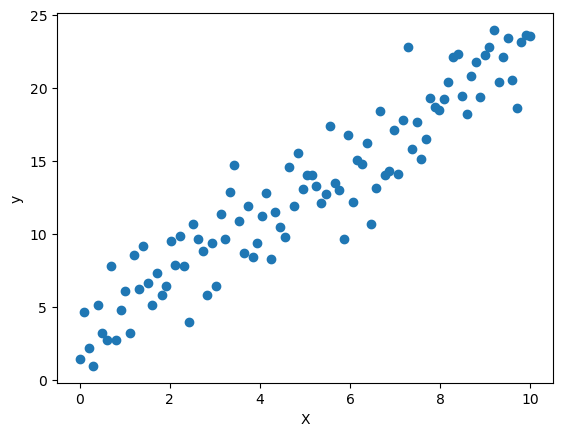

In [16]:
# Generate synthetic data for linear regression
# one layer neural net is similar to linear regression
X = torch.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 3 + torch.randn(100, 1) * 2  # Linear relation with some noise

# Visualize the data
plt.scatter(X.numpy(), y.numpy())
plt.xlabel("X")
plt.ylabel("y")

In [18]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output feature

    def forward(self, x):
        return self.linear(x)

In [19]:
# Instantiate the model
model = LinearRegressionModel()

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent with a learning rate of 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [20]:
# Training loop
num_epochs = 100 # iterations
for epoch in range(num_epochs):
    # Forward pass: compute predictions and loss
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # Backward pass: compute gradients and update parameters
    optimizer.zero_grad()  # Reset gradients to zero
    loss.backward()        # Backpropagate the error
    optimizer.step()       # Update parameters
    
    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 5.3592
Epoch [20/100], Loss: 5.2460
Epoch [30/100], Loss: 5.1437
Epoch [40/100], Loss: 5.0510
Epoch [50/100], Loss: 4.9671
Epoch [60/100], Loss: 4.8911
Epoch [70/100], Loss: 4.8223
Epoch [80/100], Loss: 4.7601
Epoch [90/100], Loss: 4.7037
Epoch [100/100], Loss: 4.6527


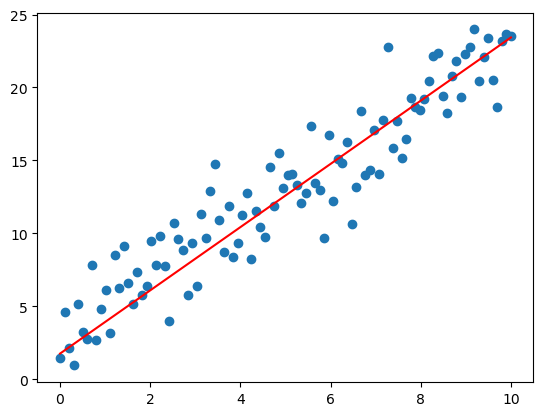

In [21]:
# Plot the model's predictions
predicted = model(X).detach().numpy()  # Detach to convert to numpy
plt.plot(X.numpy(), predicted, color="red", label="Fitted Line")
plt.scatter(X.numpy(), y.numpy())

In [23]:
model.linear.weight.data, model.linear.bias.data
#slope 2 intercept 3 kinda off.... increase iterations for better

(tensor([[2.1665]]), tensor([1.7646]))

### Using the template code above, generate 3-dimensional synthetic linear regression data
You are encouraged to translate your homework solution from numpy into torch.

In [78]:
## Generate 3-dim. syn. data
X = torch.randn(100, 3)
## Generate random values for the weights and intercept
weights = torch.randn(3+1, 1)
## Convert to numpy next step
X_np = X.numpy()
## Add ones to account for intercept
new_x = np.hstack((np.ones((100, 1)), X_np))
## Generate y's
y = np.dot(new_x, weights) + np.random.randn(100,1)

In [ ]:
## Convert to tensors w float format to fix error i was getting
X = torch.from_numpy(X_np).float()
Y = torch.from_numpy(y).float()
## Updated class defs
class MultiLinearRegressionModel(nn.Module):
    def __init__(self):
        super(MultiLinearRegressionModel, self).__init__()
        self.linear = nn.Linear(3, 1)  # 1 input feature, 1 output feature
    def forward(self, x):
        return self.linear(x)
## Instantiate the model
model = MultiLinearRegressionModel()
## Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()
## Define the optimizer (Stochastic Gradient Descent with a learning rate of 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)
## Training loop
num_epochs = 100
for epoch in range(num_epochs):
    ## Forward pass: compute predictions and loss
    predictions = model(X)
    loss = criterion(predictions, Y)
    ## Backward pass: compute gradients and update parameters
    optimizer.zero_grad()  ## Reset gradients to zero
    loss.backward()        ## Backpropagate the error
    optimizer.step()       ## Update parameters
    ## Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

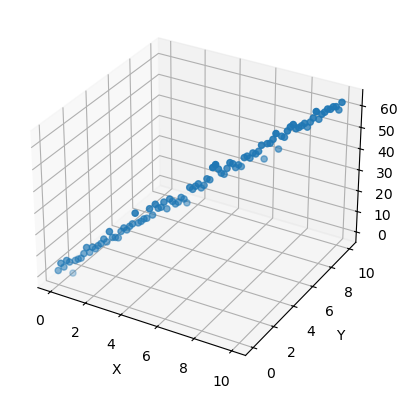

In [44]:
# Generate synthetic data for linear regression
# one layer neural net is similar to linear regression
X = torch.linspace(0, 10, 100).reshape(-1, 1)
Y = torch.linspace(0, 10, 100).reshape(-1, 1)

Z = 2 * X + 4 * Y + 3 + torch.randn(100, 1) * 2  # Linear relation with some noise

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.numpy(), Y.numpy(), Z.numpy())

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Build your own neural net!

In [28]:
class MultiLinearRegressionModel(nn.Module):
    def __init__(self):
        super(MultiLinearRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)  # 2 input feature, 1 output feature

        # your code here  

    def forward(self, input):
        # your code here
        return self.linear(input)

In [29]:
# your training code here
# Instantiate the model
tracks behind the hood
model_1 = MultiLinearRegressionModel()

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent with a learning rate of 0.01)
optimizer = optim.SGD(model_1.parameters(), lr=0.01)

In [37]:
# Training loop
num_epochs = 1000 # iterations
inputs = torch.cat((X, Y), dim=1)
for epoch in range(num_epochs):
    # Forward pass: compute predictions and loss
    predictions = model(inputs)
    loss = criterion(predictions, Z)
    
    # Backward pass: compute gradients and update parameters
    optimizer.zero_grad()  # Reset gradients to zero
    loss.backward()        # Backpropagate the error
    optimizer.step()       # Update parameters
    
    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/1000], Loss: 5.3210
Epoch [20/1000], Loss: 5.2756
Epoch [30/1000], Loss: 5.2345
Epoch [40/1000], Loss: 5.1974
Epoch [50/1000], Loss: 5.1639
Epoch [60/1000], Loss: 5.1335
Epoch [70/1000], Loss: 5.1061
Epoch [80/1000], Loss: 5.0813
Epoch [90/1000], Loss: 5.0589
Epoch [100/1000], Loss: 5.0386
Epoch [110/1000], Loss: 5.0202
Epoch [120/1000], Loss: 5.0036
Epoch [130/1000], Loss: 4.9886
Epoch [140/1000], Loss: 4.9751
Epoch [150/1000], Loss: 4.9628
Epoch [160/1000], Loss: 4.9517
Epoch [170/1000], Loss: 4.9417
Epoch [180/1000], Loss: 4.9326
Epoch [190/1000], Loss: 4.9244
Epoch [200/1000], Loss: 4.9170
Epoch [210/1000], Loss: 4.9103
Epoch [220/1000], Loss: 4.9042
Epoch [230/1000], Loss: 4.8988
Epoch [240/1000], Loss: 4.8938
Epoch [250/1000], Loss: 4.8893
Epoch [260/1000], Loss: 4.8853
Epoch [270/1000], Loss: 4.8816
Epoch [280/1000], Loss: 4.8783
Epoch [290/1000], Loss: 4.8753
Epoch [300/1000], Loss: 4.8726
Epoch [310/1000], Loss: 4.8701
Epoch [320/1000], Loss: 4.8679
Epoch [330/1000],

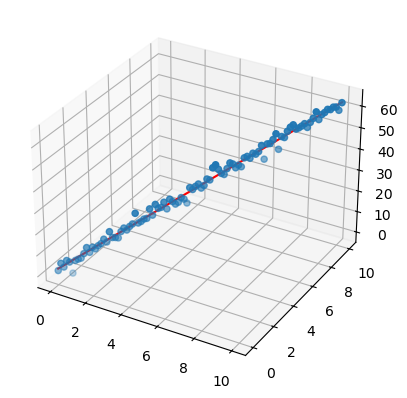

In [46]:
# Plot the model's predictions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
predicted = model(inputs).detach().numpy()  # Detach to convert to numpy
ax.plot(X.numpy(), Y.numpy(), predicted, color = "red")
ax.scatter(X.numpy(), Y.numpy(), Z.numpy())

In [39]:
model.linear.weight.data, model.linear.bias.data
#slope 2 intercept 3 kinda off.... increase iterations for better

(tensor([[3.4868, 2.5402]]), tensor([2.6535]))

## Building a neural net for XOR

Build a neural net for solving the XOR problem. The first line layer is written for you.
Use the training code from above to make one run, and assess whether your output is good or not.
Once you get it to run, try varying the number of layers and the number of hidden dimensions. What do you observe?

In [59]:
# XOR inputs and labels
X = torch.tensor([[0, 0], 
                  [0, 1], 
                  [1, 0], 
                  [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], 
                  [1], 
                  [1], 
                  [0]], dtype=torch.float32)

In [67]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()

        self.fc1 = nn.Linear(2, 2)   # Input layer to hidden layer
        # more layers
        self.fc2 = nn.Linear(2, 2)   
        self.fc3 = nn.Linear(2, 1)



    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation for hidden layer
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        # more feed-forward
        return x

# Instantiate the model
model = XORNet()

In [ ]:
# your training code here

In [73]:
# Training loop
num_epochs = 1000 # iterations
for epoch in range(num_epochs):
    # Forward pass: compute predictions and loss
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # Backward pass: compute gradients and update parameters
    optimizer.zero_grad()  # Reset gradients to zero
    loss.backward()        # Backpropagate the error
    optimizer.step()       # Update parameters
    
    # Print progress
    #if (epoch + 1) % 10 == 0:
       # print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

/var/folders/62/q5cwr8p541q40q2zbtg90hxh0000gn/T/ipykernel_49794/3586241590.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[i, 0], X[i, 1], edgecolor='black', s=100, marker='x', linewidth=2)  # Cross for class 1


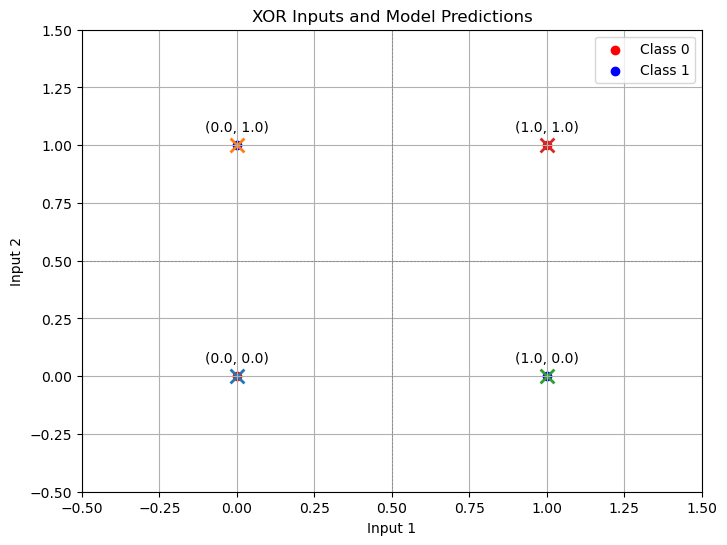

In [74]:


# Create a scatter plot for the XOR dataset and predictions
plt.figure(figsize=(8, 6))

# Scatter plot for each point in XOR dataset
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], color='red', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X[i, 0], X[i, 1], color='blue', label='Class 1' if i == 1 else "")

# Scatter plot for predicted outputs
for i in range(len(predicted_classes)):
    if predicted_classes[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], edgecolor='black', s=100, marker='o', facecolors='none', linewidth=2)  # Empty circle for class 0
    else:
        plt.scatter(X[i, 0], X[i, 1], edgecolor='black', s=100, marker='x', linewidth=2)  # Cross for class 1

# Annotate the points
for i in range(len(X)):
    plt.annotate(f"({X[i, 0].item()}, {X[i, 1].item()})", (X[i, 0].item(), X[i, 1].item()), textcoords="offset points", xytext=(0,10), ha='center')

# Set the axis labels and title
plt.title('XOR Inputs and Model Predictions')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.legend()
plt.axhline(0.5, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0.5, color='gray', linewidth=0.5, linestyle='--')
plt.show()

In [65]:
X

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [57]:
X.numpy()

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [79]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 100)   # Input layer to hidden layer
        # more layers
        self.fc2 = nn.Linear(100, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)  # ReLU activation for hidden layer
        # more feed-forward
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        x = torch.relu(x)
        return x
# Instantiate the model
model = XORNet()
# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()
# Define the optimizer (Stochastic Gradient Descent with a learning rate of 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

## After training, try to see if your predictions are good.

In [75]:
# Here, testing for the combination [1, 0]
test_input = torch.tensor([[1, 0]], dtype=torch.float32)

# Make the prediction
with torch.no_grad():  # No need for gradients during inference
    prediction = model(test_input)
    # Apply threshold to get binary prediction
    predicted_class = (prediction > 0.5).float()
    
predicted_class

tensor([[0.]])